# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: 
- MSSV: 
- Lớp: 

# Import

In [28]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
import copy
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [29]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)
# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [30]:
# Cài đặt các hàm cần thiết ở đây

def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x, x**2))
    
    return X, y

class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X) 
        #(AtA)^-1 x At x b
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)  
    

def mae(y, y_hat):
    # để ravel để y và y_hat về cùng chiều
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [31]:
# Phần code cho yêu cầu 1a

# dùng iloc lấy 11 đặc trưng đầu tiên vào X_1a_train
# y_train đã có
X_1a_train = X_train.iloc[:, :11]
X_1a_test = X_test.iloc[:, :11]
# lr1 = OLSLine....fit(X_1a_train, y_train)
lr1 = OLSLinearRegression().fit(X_1a_train, y_train)
# lr.get_parasm()
lr1.get_params().ravel()



array([-22756.51282098,    804.50315567,   1294.65456525, -91781.89753057,
        23182.38867916,   1437.54867231,  -8570.66198486,    147.85829929,
          152.88847648,    117.22184593,  34552.28622083])

In [32]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra

# y_hat = lr.predict(X_1a_train)
y_pred_1a_test = lr1.predict(X_1a_test)
# mae(y_test, y_hat)
mae(y_test, y_pred_1a_test)


104863.77754032997

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513 \times Gender + 804.503 \times 10percentage + 1294.655 \times 12percentage - 91781.898 \times CollegeTier + 23182.389 \times Degree + 1437.549 \times CollegeGPA  - 8570.662 \times CollegeCityTire + 147.858 \times English + 152.888 \times Logical + 117.223 \times Quant + 34552.286 \times Domain$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [33]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# chỉ xử lý trên tập train
# cài đặt cross-validation (không sử dụng của sklearn)
# phân chia thành 5 tập dữ liệu, mỗi tập tầm 490 mẫu
# shuffle trên 5 tập dữ liệu đó
# sử dụng 2 vòng lặp for
# for(5 tập dữ liệu) { for (5 thuộc tính ["com", "agr", ... "ope"])}
# lần lượt fit trên 5 tập dữ liệu
# tính từng MAE của các thuộc tính, r lấy trung bình

# chuẩn bị các tập dữ liệu cần thiết
def find_best_feature_with_mae(X_train_specific, k):
    mae_res = []
    mae_list = np.zeros(X_train_specific.shape[1])
    y_train_copy = copy.deepcopy(y_train)
    X_train_specific, y_train_copy = shuffle(X_train_specific, y_train_copy, random_state=42)
    for i in range(k):
        start_point = i * len(X_train_specific) // k
        end_point = (i + 1) * len(X_train_specific) // k

        X_train_fold = X_train_specific[start_point:end_point]
        y_train_fold = y_train_copy[start_point:end_point]
        
        X_remain = np.concatenate((X_train_specific[:start_point], X_train_specific[end_point:]), axis=0)
        y_remain = np.concatenate((y_train_copy[:start_point], y_train_copy[end_point:]), axis=0)
        for j in range(X_train_fold.shape[1]):
                lr = OLSLinearRegression()
                lr.fit(X_remain[:, j].reshape(-1, 1), y_remain)
                X_train_fold_np = X_train_fold.to_numpy()
                X_pred_1b_test = lr.predict(X_train_fold_np[:, j].reshape(-1, 1))
                mae_list[j] += mae(y_train_fold, X_pred_1b_test)

    for i in range(len(mae_list)):
        mae_list[i]/=k
        feature_name = X_train_specific.columns[i]
        mae_res.append([feature_name, mae_list[i]])
    return mae_res

k = 5
X_train_copy = copy.deepcopy(X_train)
X_1b_train = X_train_copy.iloc[:, -5:]
mae_res = find_best_feature_with_mae(X_1b_train, k)
print(mae_res)


[['conscientiousness', 306311.5891833392], ['agreeableness', 300904.33937061584], ['extraversion', 307023.94642483816], ['nueroticism', 299572.1877999159], ['openess_to_experience', 302950.20046679914]]


In [34]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
def calculate_mae(X_train, X_test):
    model = OLSLinearRegression().fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    return mae(y_test, y_pred_test)



X_train_best = X_train.loc[:, "nueroticism"].to_numpy()
X_train_best = X_train_best.reshape(-1, 1)
best_personality_feature_model = OLSLinearRegression().fit(X_train_best, y_train)
best_personality_feature_model.get_params()

array([-56546.30375318])

In [35]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test_best = X_test.loc[:, "nueroticism"].to_numpy()
X_test_best = X_test_best.reshape(-1, 1)
y_pred_test_best = best_personality_feature_model.predict(X_test_best)
print(mae(y_test, y_pred_test_best))


291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304 \times Nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [36]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
k = 5
X_1c_train = X_train_copy.loc[:, ["English", "Logical", "Quant"]]
mae_res = find_best_feature_with_mae(X_1c_train, k)
print(mae_res)



[['English', 121921.86341266916], ['Logical', 120270.24081865065], ['Quant', 118122.11802986905]]


In [37]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_1c_train_best = X_train.loc[:, "Quant"].to_numpy()
X_1c_train_best = X_1c_train_best.reshape(-1, 1)
best_skill_feature_model = OLSLinearRegression().fit(X_1c_train_best, y_train)
best_skill_feature_model.get_params()

array([585.89538084])

In [38]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_1c_test_best = X_test.loc[:, "Quant"].to_numpy()
X_1c_test_best = X_1c_test_best.reshape(-1, 1)
y_pred_1c_test_best = best_skill_feature_model.predict(X_1c_test_best)
# print(X_1c_test_best)
print(mae(y_test, y_pred_1c_test_best))

106819.57761989674


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895 \times Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [39]:
# Trình bày các phần tìm ra mô hình

## Thử nghiệm, so sánh các mô hình

In [40]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

In [41]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [42]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

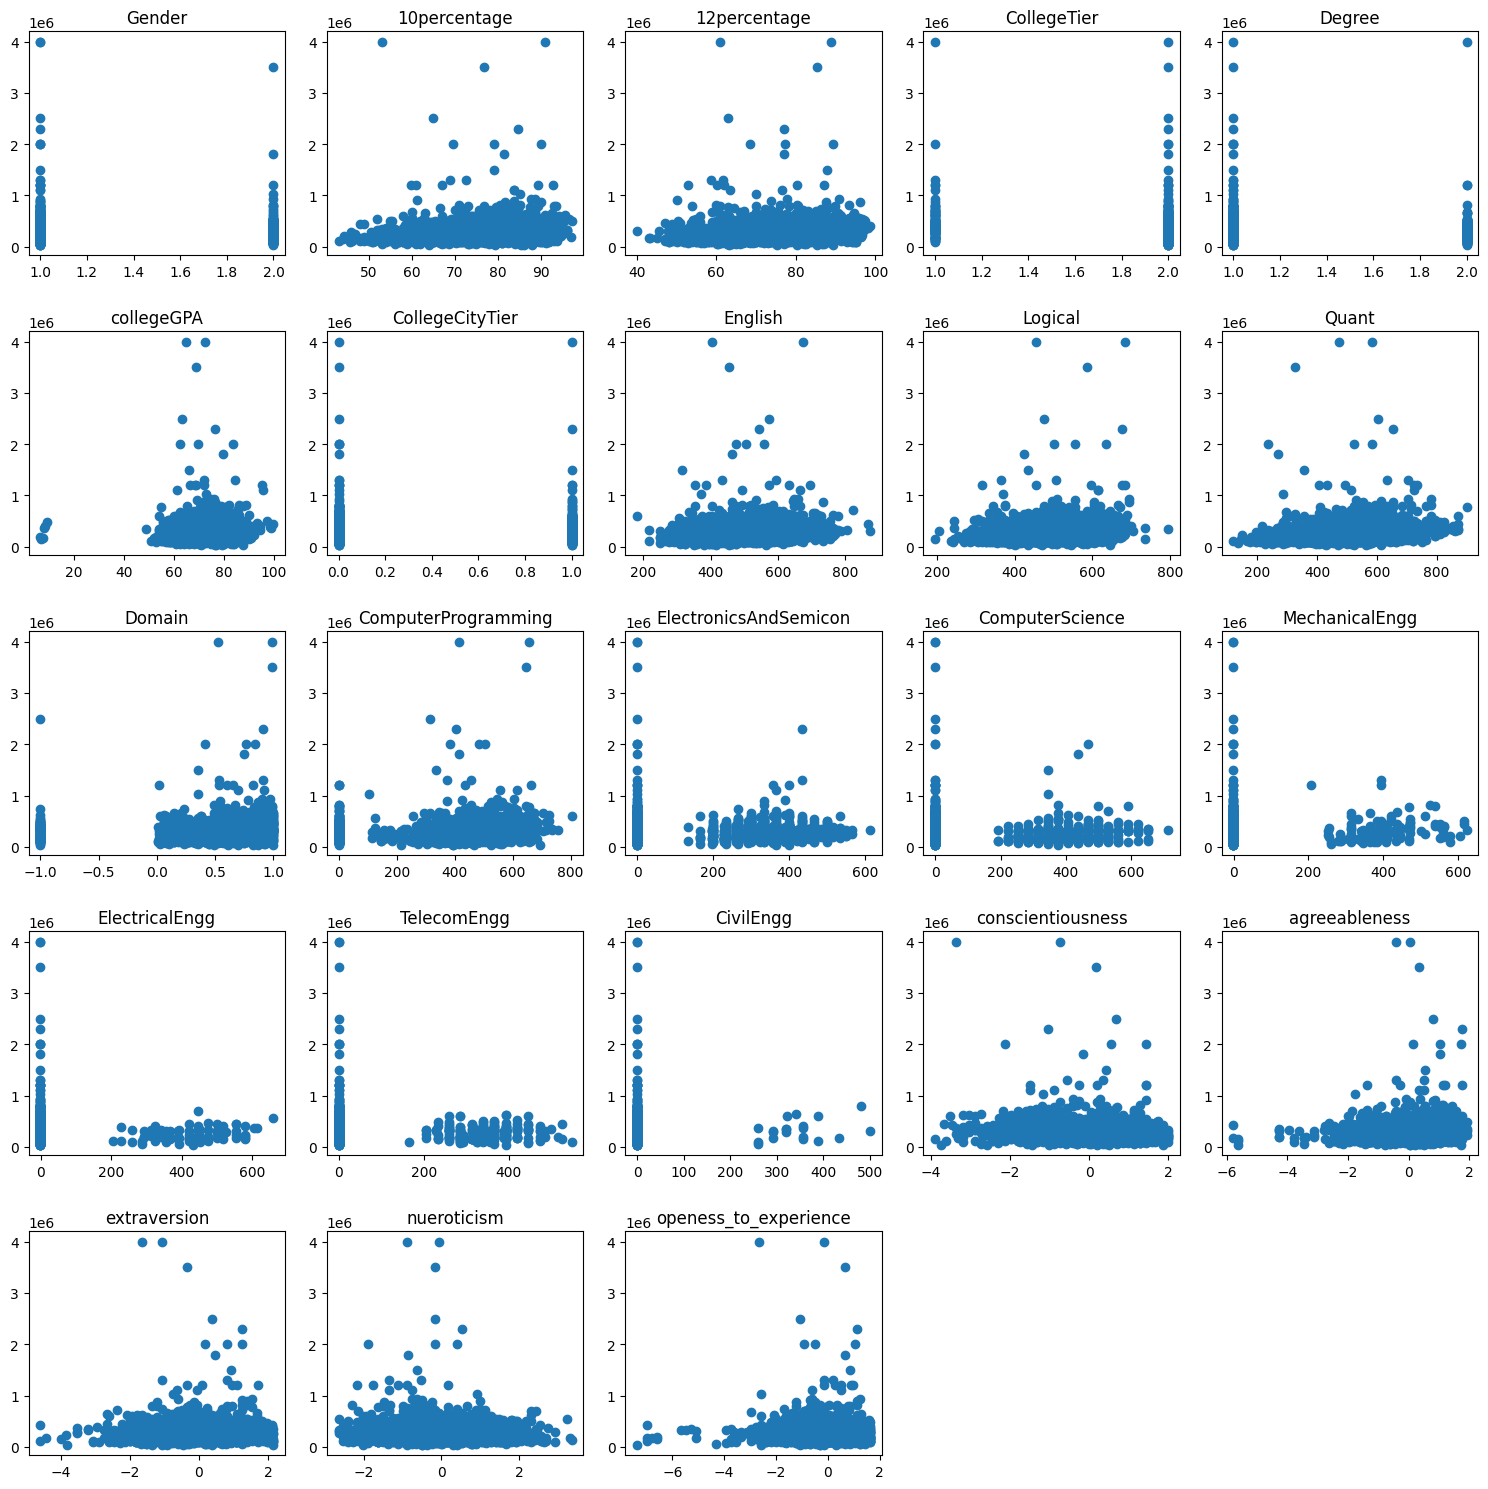

In [43]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
num_rows = int(np.ceil(X_train_np.shape[1] / 5))
plt.figure(figsize=(15, num_rows * 3))
for i in range(X_train_np.shape[1]):
    plt.subplot(num_rows, 5, i + 1)
    plt.scatter(X_train_np[:, i].reshape(-1, 1), y_train_np, marker='o')
    plt.title(X_train.columns[i])
plt.tight_layout()
plt.show()
# X_train_np = X_train.to_numpy()
# print(X_train_np[:, 0].reshape(-1, 1))

In [44]:

lr_d = OLSLinearRegression()
lr_d.fit(X_train, y_train)
best_model_1 = lr_d.predict(X_test)
print(mae(y_test, best_model_1))

101872.2105661916


In [46]:
mae_list = []
for i in range(X_train.shape[1]):
    X_train_single_feature = X_train.iloc[:, i].to_numpy().reshape(-1, 1)
    single_feature_model = OLSLinearRegression().fit(X_train_single_feature, y_train)
    X_test_single_feature = X_test.iloc[:, i].to_numpy().reshape(-1, 1)
    y_pred_single_feature_test = single_feature_model.predict(X_test_single_feature)
    mae_list.append([X_train.columns[i], mae(y_test, y_pred_single_feature_test)])
mae_list = sorted(mae_list, key=lambda x: x[1])
for feature, mae_score in mae_list:
    print(feature + "'s MAE: " + str(mae_score) + "\n")

Quant's MAE: 106819.57761989674

12percentage's MAE: 111427.17548179813

10percentage's MAE: 111941.80353625846

collegeGPA's MAE: 114600.22461752963

Logical's MAE: 115082.021386855

English's MAE: 117213.92896500615

CollegeTier's MAE: 126802.14818310524

Degree's MAE: 132669.85286364728

Gender's MAE: 143583.73960216998

ComputerProgramming's MAE: 153100.4245960135

Domain's MAE: 165468.18887561752

CollegeCityTier's MAE: 243209.68781470292

ElectronicsAndSemicon's MAE: 246076.42945173613

ComputerScience's MAE: 264442.7652088114

TelecomEngg's MAE: 285242.2326270083

MechanicalEngg's MAE: 287294.54401029367

nueroticism's MAE: 291019.693226953

agreeableness's MAE: 291801.49928674015

ElectricalEngg's MAE: 292626.4499253915

openess_to_experience's MAE: 293586.8612761376

CivilEngg's MAE: 298941.36524326174

conscientiousness's MAE: 299180.6403828239

extraversion's MAE: 300027.0710203063



<Axes: >

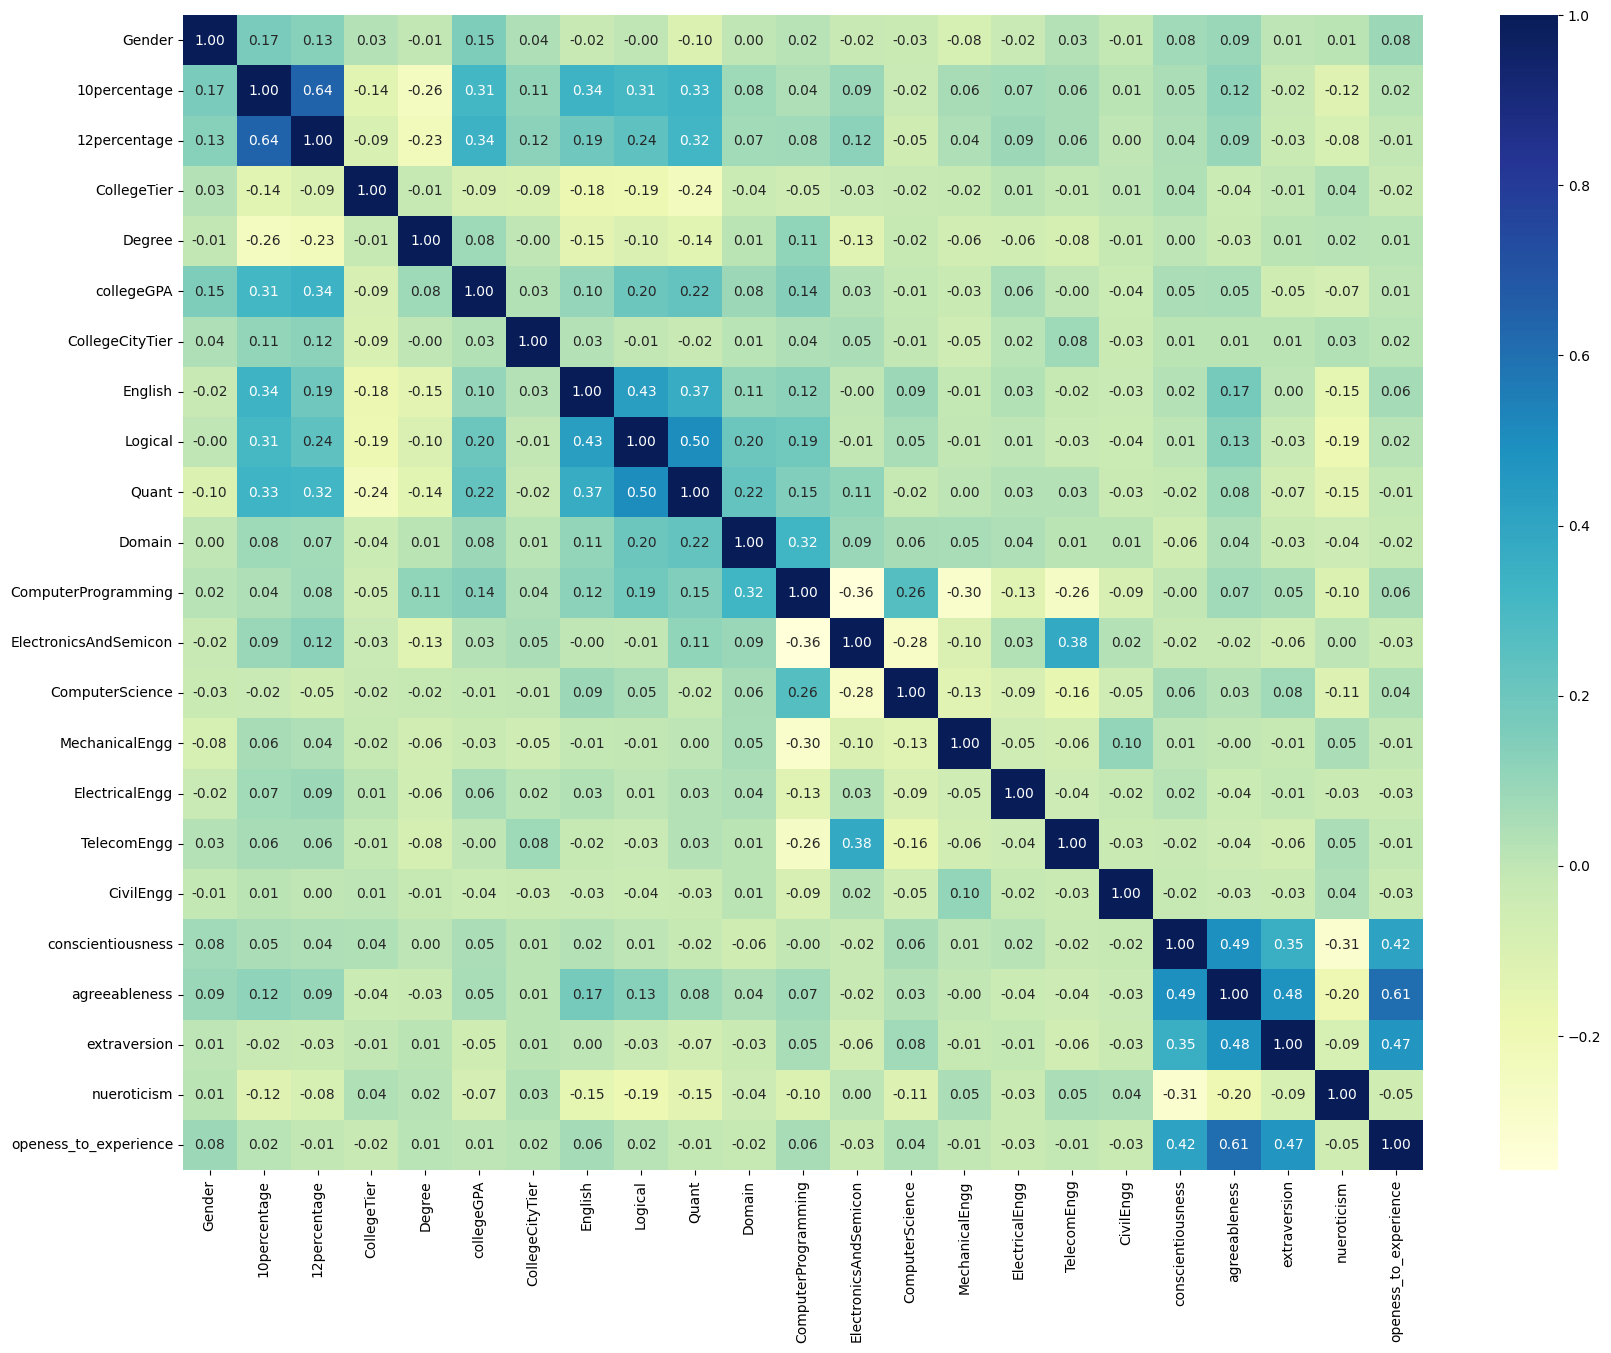

In [47]:
plt.figure(figsize=(20, 15))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu") # or cmap="coolwarm"

In [48]:
def plot_one_feature(X_train, feature):
    plt.scatter(X_train_1d[feature], y_train_np.reshape(-1, 1), marker='o')
    plt.title(feature)
    plt.show()

X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)


# processing on X_train
X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_train_1d["agreeableness"] = np.square(X_train_1d["agreeableness"]) + np.square(X_train_1d["openess_to_experience"]) + np.square(X_train_1d["conscientiousness"])
X_train_1d["Logical"] = np.square(X_train_1d["Logical"]) + np.square(X_train_1d["Quant"])
X_train_1d["Domain"] = np.square(X_train_1d["Domain"]) + np.square(X_train_1d["ComputerProgramming"])

# processing on X_test
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])
X_test_1d["agreeableness"] = np.square(X_test_1d["agreeableness"]) + np.square(X_test_1d["openess_to_experience"]) + np.square(X_test_1d["conscientiousness"])
X_test_1d["Logical"] = np.square(X_test_1d["Logical"]) + np.square(X_test_1d["Quant"])
X_test_1d["Domain"] = np.square(X_test_1d["Domain"]) + np.square(X_test_1d["ComputerProgramming"])


# plot_one_feature(X_train_1d, "Quant")

X_train_model_2 = X_train_1d.loc[:, ["10percentage","agreeableness", "Logical", "Domain"]]
X_train_model_2 = X_train_model_2.to_numpy()
X_test_model_2 = X_test_1d.loc[:, ["10percentage", "agreeableness", "Logical", "Domain"]]
X_test_model_2 = X_test_model_2.to_numpy()
print(calculate_mae(X_train_model_2, X_test_model_2))

102655.17476271212


In [92]:
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)


# plot_one_feature(X_train_1d, "MechanicalEngg")
# processing on X_train
X_train_1d["ElectronicsAndSemicon"] = X_train_1d["ElectronicsAndSemicon"] + X_train_1d["TelecomEngg"]
X_train_1d["10percentage"] = np.square(X_train_1d["10percentage"]) + np.square(X_train_1d["12percentage"])
X_train_1d["agreeableness"] = np.square(X_train_1d["agreeableness"]) + np.square(X_train_1d["openess_to_experience"])
X_train_1d["Logical"] = np.square(X_train_1d["Logical"]) + np.square(X_train_1d["Quant"])
# processing on X_test
X_test_1d["ElectronicsAndSemicon"] = X_test_1d["ElectronicsAndSemicon"] + X_train_1d["TelecomEngg"]
X_test_1d["10percentage"] = np.square(X_test_1d["10percentage"]) + np.square(X_test_1d["12percentage"])
X_test_1d["agreeableness"] = np.square(X_test_1d["agreeableness"]) + np.square(X_test_1d["openess_to_experience"])
X_test_1d["Logical"] = np.square(X_test_1d["Logical"]) + np.square(X_test_1d["Quant"])

# plot_one_feature(X_train_1d, "MechanicalEngg")
X_train_model_3 = X_train_1d.loc[:, ["ElectronicsAndSemicon", "10percentage", "agreeableness", "Logical"]]
X_train_model_3 = X_train_model_3.to_numpy()
X_test_model_3 = X_test_1d.loc[:, ["ElectronicsAndSemicon", "10percentage", "agreeableness", "Logical"]]
X_test_model_3 = X_test_model_3.to_numpy()
print(calculate_mae(X_train_model_3, X_test_model_3))

104363.02840715021


In [93]:
X_train_1d = copy.deepcopy(X_train)
X_test_1d = copy.deepcopy(X_test)
X_train_model_4 = X_train_1d.iloc[:, [1, 3, 9, 11, 13]]
X_train_model_4 = X_train_model_4.to_numpy()
X_test_model_4 = X_test_1d.iloc[:, [1, 3, 9, 11, 13]]
X_test_model_4 = X_test_model_4.to_numpy()
print(calculate_mae(X_train_model_4, X_test_model_4))

101687.20639499754
